In [1]:
import os
import pickle

# Functions from other notebook file.
from ipynb.fs.full.shared_functions_server import *

In [2]:
# Move one directory back to the project root.
os.chdir("..")

In [3]:
# Suppress tensorflow log messages.
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [4]:
# GLOBALS
BATCH_SIZE = 128

IMAGE_HEIGHT = 100
IMAGE_WIDTH = 100
IMAGE_CHANNELS = 1

CATEGORIES = 10 # represents digits 0-9
DIMENSIONS = 4

---
## Evaluate Model History

In [5]:
# Open serialized training history data for VGG-16 model.
with open(r'model-info/vgg16-heterogeneous-history', 'rb') as input_file:
            history = pickle.load(input_file, encoding='bytes')

In [6]:
validation_score = history['val_acc'][-1] # get the last entry
validation_score = round(validation_score * 100, 2)
print('Validation accuracy: {}%'.format(validation_score))

training_score = history['acc'][-1] # get the last entry
training_score = round(training_score * 100, 2)
print('Training accuracy: {}%'.format(training_score))

Validation accuracy: 39.14%
Training accuracy: 55.07%


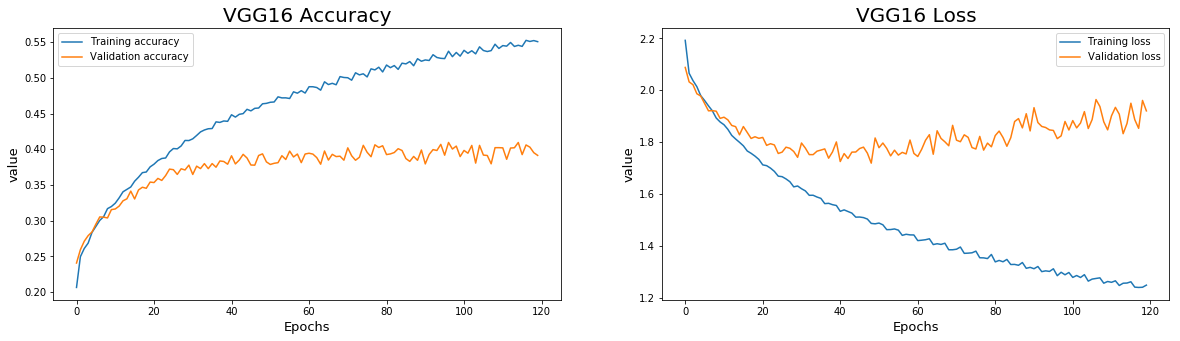

In [11]:
# Plot the training history.
title_font = 20
axis_font = 13

figure, axes = pyplot.subplots(1, 2, figsize=(20, 5))

axes[0].set_xticks(range(0, 121, 20))
axes[0].plot(history['acc'], label='Training accuracy')
axes[0].plot(history['val_acc'], label='Validation accuracy')
axes[0].set_title('VGG16 Accuracy', fontsize=20)
axes[0].set_xlabel('Epochs', fontsize=axis_font)
axes[0].set_ylabel('value', fontsize=axis_font)
axes[0].legend() 

axes[1].set_xticks(range(0, 121, 20))
axes[1].plot(history['loss'], label='Training loss')
axes[1].plot(history['val_loss'], label='Validation loss')
axes[1].set_title('VGG16 Loss', fontsize=20)
axes[1].set_xlabel('Epochs', fontsize=axis_font)
axes[1].set_ylabel('value', fontsize=axis_font)
axes[1].legend()

---
## Evaluate Model Performance

In [8]:
model = models.load_model('model-info/vgg16-heterogeneous')
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              4719616   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 19,444,554
Trainable params: 4,729,866
Non-trainable pa